HITO-0

In [205]:
import pandas as pd
import numpy as np
import networkx as nx
import math as ma
import json
import graphviz as gv


In [207]:
url="Lima-intersecciones.csv"
df = pd.read_csv(url,sep=';')

In [615]:
#Graficar
def nx2gv(G, weighted=False, params={'rankdir': 'LR', 'size': '6'},
          path=None, pathparams={'color':'orangered', 'penwidth': '3'},
          nodeinfo=False):
  if G.is_directed():
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G')
  g.attr(**params)

  for u in G.nodes:
    if nodeinfo:
      g.node(str(u), **dict(G.nodes[u]))
    else:
      g.node(str(u))

  for u, v in G.edges():
    if G.is_directed():
      pp = pathparams if path and path[v] == u else {}
    else:
      pp = pathparams if (path and path[v] == u) or (path and path[u] == v) else {}

    if weighted:
      g.edge(str(u), str(v), f"{G.edges[u, v]['weight']}", **pp)
    else:
      g.edge(str(u), str(v), **pp)
      
  return g

def adjmatrix2gv(G, weighted=False, params={'rankdir': 'LR', 'size': '5'}):
  return nx2gv(nx.from_numpy_matrix(G), weighted, params)
             
def adjlist2gv(G, type='digraph', weighted=False, params={'rankdir': 'LR'}):
  digraph = type == 'digraph'
  if digraph:
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G')
  Gv.attr(**params)

  n = len(G)
  for i in range(n):
    g.node(str(i))
             
  for u in range(n):
    if weighted:
      for v, w in range(n):
        g.edge(str(u), str(v), str(w))
        if digraph:
          g.edge(str(v), str(u), str(w))
    else:
      for v in range(n):
        g.edge(str(u), str(v))
        if digraph:
          g.edge(str(v), str(u))

  return g
      
def path2gv(path, params={'rankdir': 'LR', 'size': '5'}):
  g = gv.Digraph('G')
  g.attr(**params)
              
  n = len(path)
  for i in range(n):
    g.node(str(i))

  for v, u in enumerate(path):
    if u != -1:
      g.edge(str(u), str(v))

  return g
              
def wedges2adjlist(filename: str, type='graph'):
  with open(filename) as file:
    data = []
    n = 0
    for line in file:
      if line[0] != '#':
        data.append([int(x) for x in line.strip().split(',')])
        if data[-1][0] > n: n = data[-1][0]
        if data[-1][1] > n: n = data[-1][1]

  n += 1
  G = [[] for _ in range(n)]
  for u, v, w in data:
    G[u].append((v, w))
    if type == 'graph':
      G[v].append((u, w))
              
  return G

In [212]:
nomCalle=df['NOMBRE_CALLE'].unique()
print('Podemos ver la cantidad de calles: ', len(df),' calles')

Podemos ver la cantidad de calles:  84673  calles


In [591]:
#cantidad de intersecciones de una calle
intersecciones=dict()
print('catidad de intersecciones de una calle')
for nom in nomCalle:
  intersecciones[nom]=df[df['NOMBRE_CALLE']==nom]
  #print(nom,len(intersecciones[nom]))


catidad de intersecciones de una calle


In [507]:
#Ingrese la calle que sea obtener sus intersecciones
no_type_checking=''
nom_calle='Plaza 2 de Mayo'

In [508]:
iDinterseccion=intersecciones[nom_calle]['ID_COORDENADAS1'].unique()
print('Las intersecciones de las calles de ', nom_calle, 'son: ',len(iDinterseccion))
print(iDinterseccion)


Las intersecciones de las calles de  Plaza 2 de Mayo son:  11
[ 31035122  31035142  31035109  31035110  31035112  31035113  31035116
  31035117 310954401  31035119  31035121]


In [509]:
#Obteniendo coordenada X1
X1=intersecciones[nom_calle]['X1'].unique()
print(X1)


[-12.0459308 -12.0460958 -12.0461253 -12.0462768 -12.0466033 -12.0466783
 -12.0466949 -12.0465202 -12.0464537 -12.0462019 -12.0459528]


In [510]:
#Obteniendo coordenada Y1
Y1=intersecciones[nom_calle]['Y1'].unique()
print(Y1)

[-77.0427831 -77.0430896 -77.0431113 -77.0431753 -77.0431118 -77.0430483
 -77.042435  -77.0423222 -77.0423023 -77.0423251 -77.0425923]


In [522]:
#Obteniendo nombre de Id interseccion
iDIntersecciones1=intersecciones[nom_calle]['ID_COORDENADAS1'].unique()
print('Las intersecciones de la calle', nom_calle, 'son:',len(iDIntersecciones1))
print(iDIntersecciones1)

Las intersecciones de la calle Plaza 2 de Mayo son: 11
[ 31035122  31035142  31035109  31035110  31035112  31035113  31035116
  31035117 310954401  31035119  31035121]


In [582]:
#obteniendo la distancia
inicioX=X1[0]
inicioY=Y1[0]
llegadaX=X1[1]
llegadaY=Y1[1]

dis=np.sqrt(abs((llegadaX-inicioX)+(llegadaY-inicioY)))
inicioX
inicioY

-77.0427831

In [590]:
Grafo=nx.Graph()
size=len(iDIntersecciones1)
for i in range(size):
  Grafo.add_node(iDIntersecciones1[i])
  if(i<size-1):
        inicioX=X1[i]
        inicioY=Y1[i]
        llegadaX=X1[i+1]
        llegadaY=Y1[i+1]
        dis=np.sqrt(abs((llegadaX-inicioX)+(llegadaY-inicioY)))
        Grafo.add_edge(iDIntersecciones1[i],iDIntersecciones1[i+1],weight=dis)
        print(inicioX,'/',inicioY)
        
        print(dis)    
        
  else:
    i=size-1


-12.0459308 / -77.0427831
0.021714050750766
-12.0460958 / -77.0430896
0.00715541752835046
-12.0461253 / -77.0431113
0.014679918255703977
-12.0462768 / -77.0431753
0.016217274740347065
-12.0466033 / -77.0431118
0.0033911649901627048
-12.0466783 / -77.0430483
0.024427443582932314
-12.0466949 / -77.042435
0.016955824957727933
-12.0465202 / -77.0423222
0.009295160030744787
-12.0464537 / -77.0423023
0.015132745950569435
-12.0462019 / -77.0423251
0.004254409476834498


In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
import graphviz
A = nx.nx_agraph.to_agraph(Grafo)
A.layout('dot')
graphviz.Source(A.to_string())

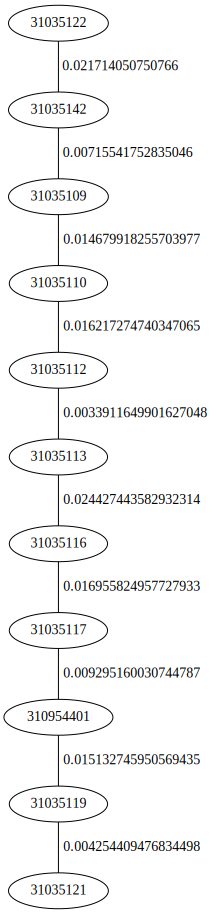

In [578]:
nx2gv(Grafo, nodeinfo = True, weighted=True, params={'size':'20'})